In [1]:
#loading important modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from imblearn.over_sampling import SMOTE
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn import svm

%matplotlib inline
matplotlib.style.use('ggplot')

/anaconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Read the dataset
data = pd.read_csv('inventory.csv')

In [3]:
#check data quality
data.head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99


In [4]:
#Statistical description of the dataset
data.describe()

,Order,SKU_number,SoldFlag,SoldCount,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
count,198917.000000,1.989170e+05,75996.000000,75996.000000,198917.000000,198917.000000,1.989170e+05,198917.000000,198917.000000,198917.000000,198917.000000,198917.000000
mean,106483.543242,8.613626e+05,0.171009,0.322306,3.412202,0.642248,1.117115e+06,90.895243,2006.016414,41.426283,30.982487,46.832053
std,60136.716784,8.699794e+05,0.376519,1.168615,3.864243,0.479340,1.522090e+06,86.736367,9.158331,37.541215,69.066155,128.513236
min,2.000000,5.000100e+04,0.000000,0.000000,0.000000,0.000000,6.275000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55665.000000,2.172520e+05,0.000000,0.000000,1.000000,0.000000,1.614188e+05,42.000000,2003.000000,21.000000,4.910000,17.950000
50%,108569.000000,6.122080e+05,0.000000,0.000000,2.000000,1.000000,5.822240e+05,69.950000,2007.000000,32.000000,16.080000,33.980000
75%,158298.000000,9.047510e+05,0.000000,0.000000,5.000000,1.000000,1.430083e+06,116.000000,2011.000000,50.000000,40.240000,55.490000
max,208027.000000,3.960788e+06,1.000000,73.000000,99.000000,1.000000,1.738445e+07,12671.480000,2018.000000,2542.000000,14140.210000,19138.790000


In [5]:
#include categorical variable
data.describe(include='all')

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
count,198917.000000,198917,1.989170e+05,75996.000000,75996.000000,198917,198917.000000,198917.000000,1.989170e+05,198917.000000,198917.000000,198917.000000,198917.000000,198917.000000
unique,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Active,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,122921,NaN,NaN,NaN,100946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,106483.543242,NaN,8.613626e+05,0.171009,0.322306,NaN,3.412202,0.642248,1.117115e+06,90.895243,2006.016414,41.426283,30.982487,46.832053
std,60136.716784,NaN,8.699794e+05,0.376519,1.168615,NaN,3.864243,0.479340,1.522090e+06,86.736367,9.158331,37.541215,69.066155,128.513236
min,2.000000,NaN,5.000100e+04,0.000000,0.000000,NaN,0.000000,0.000000,6.275000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55665.000000,NaN,2.172520e+05,0.000000,0.000000,NaN,1.000000,0.000000,1.614188e+05,42.000000,2003.000000,21.000000,4.910000,17.950000
50%,108569.000000,NaN,6.122080e+05,0.000000,0.000000,NaN,2.000000,1.000000,5.822240e+05,69.950000,2007.000000,32.000000,16.080000,33.980000
75%,158298.000000,NaN,9.047510e+05,0.000000,0.000000,NaN,5.000000,1.000000,1.430083e+06,116.000000,2011.000000,50.000000,40.240000,55.490000


In [6]:
data.shape

(198917, 14)

In [7]:
#total number of products & unique values of the columns
data.nunique()

Order               198917
File_Type                2
SKU_number          133360
SoldFlag                 2
SoldCount               37
MarketingType            2
ReleaseNumber           71
New_Release_Flag         2
StrengthFactor      197424
PriceReg             11627
ReleaseYear             85
ItemCount              501
LowUserPrice         12102
LowNetPrice          15403
dtype: int64

In [8]:
#count the historical and active state
print(data[data['File_Type'] == 'Historical']['SKU_number'].count())
print(data[data['File_Type'] == 'Active']['SKU_number'].count())

75996
122921


In [9]:
#split the dataset into two parts based on file_type
hist = data[data['File_Type'] == 'Historical']
act = data[data['File_Type'] == 'Active']

In [10]:
hist.head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99


In [11]:
act.head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
75996,85107,Active,869734,NaN,NaN,S,9,1,1.251478e+06,92.82,2018,49,11.46,69.08
75997,85108,Active,3741319,NaN,NaN,S,4,1,2.407071e+06,49.00,2016,0,0.00,49.00
75998,85109,Active,3517789,NaN,NaN,S,3,1,6.890734e+06,44.95,2016,0,0.00,0.00
75999,85110,Active,1455936,NaN,NaN,S,8,1,9.156233e+04,219.00,2014,44,13.71,59.81
76000,85111,Active,2921480,NaN,NaN,S,5,1,6.922798e+06,83.95,2016,0,0.00,79.80


# EDA

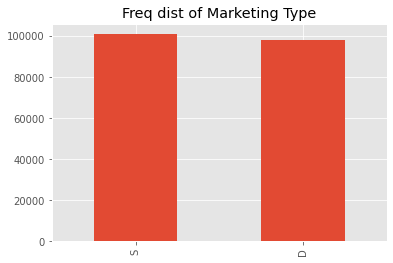

In [12]:
#We will be using the historical dataset for the analysis and training the model univariate distribution plots
data['MarketingType'].value_counts().plot.bar(title = 'Freq dist of Marketing Type')

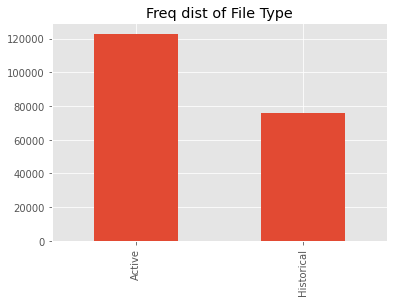

In [13]:
data['File_Type'].value_counts().plot.bar(title = 'Freq dist of File Type')

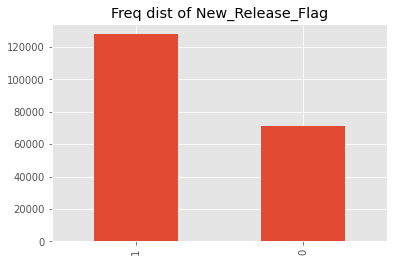

In [14]:
data['New_Release_Flag'].value_counts().plot.bar(title = 'Freq dist of New_Release_Flag')

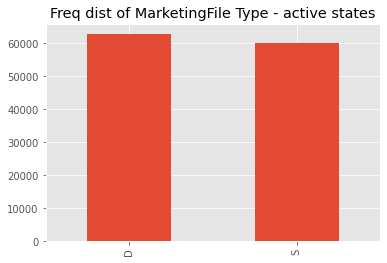

In [15]:
act['MarketingType'].value_counts().plot.bar(title = 'Freq dist of MarketingFile Type - active states')

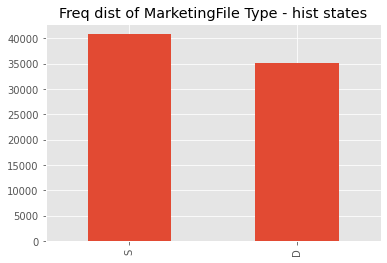

In [16]:
hist['MarketingType'].value_counts().plot.bar(title = 'Freq dist of MarketingFile Type - hist states')

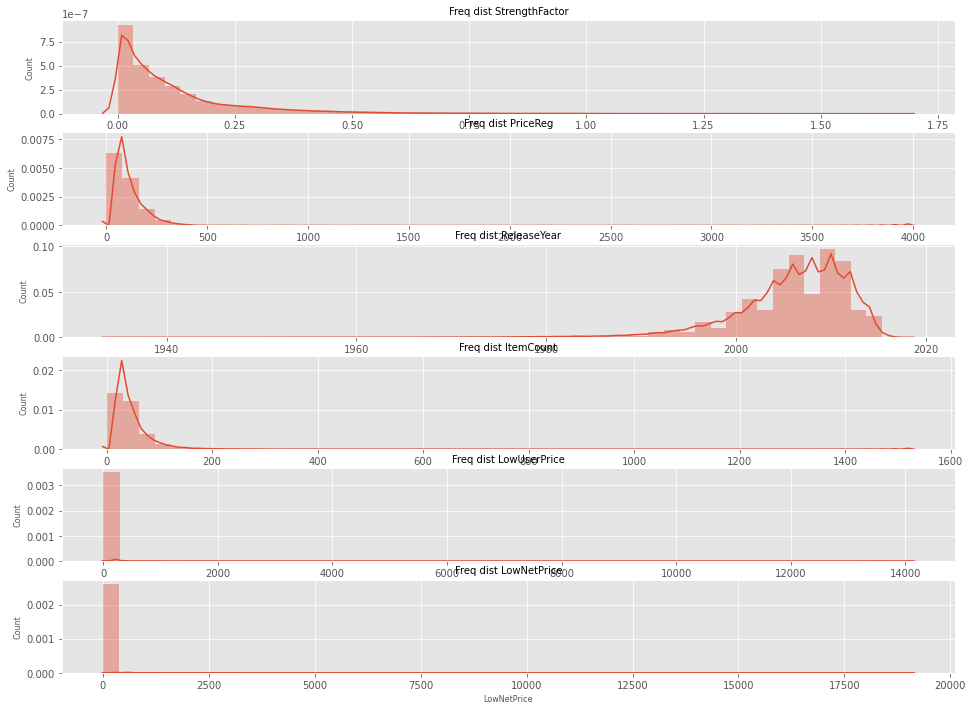

In [17]:
#Numeric variable plots 
cols = ['StrengthFactor', 'PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice']

fig, ax = plt.subplots(len(cols), figsize = (16,12))

for i, col_val in enumerate(cols):
    sns.distplot(hist[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist ' + col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    

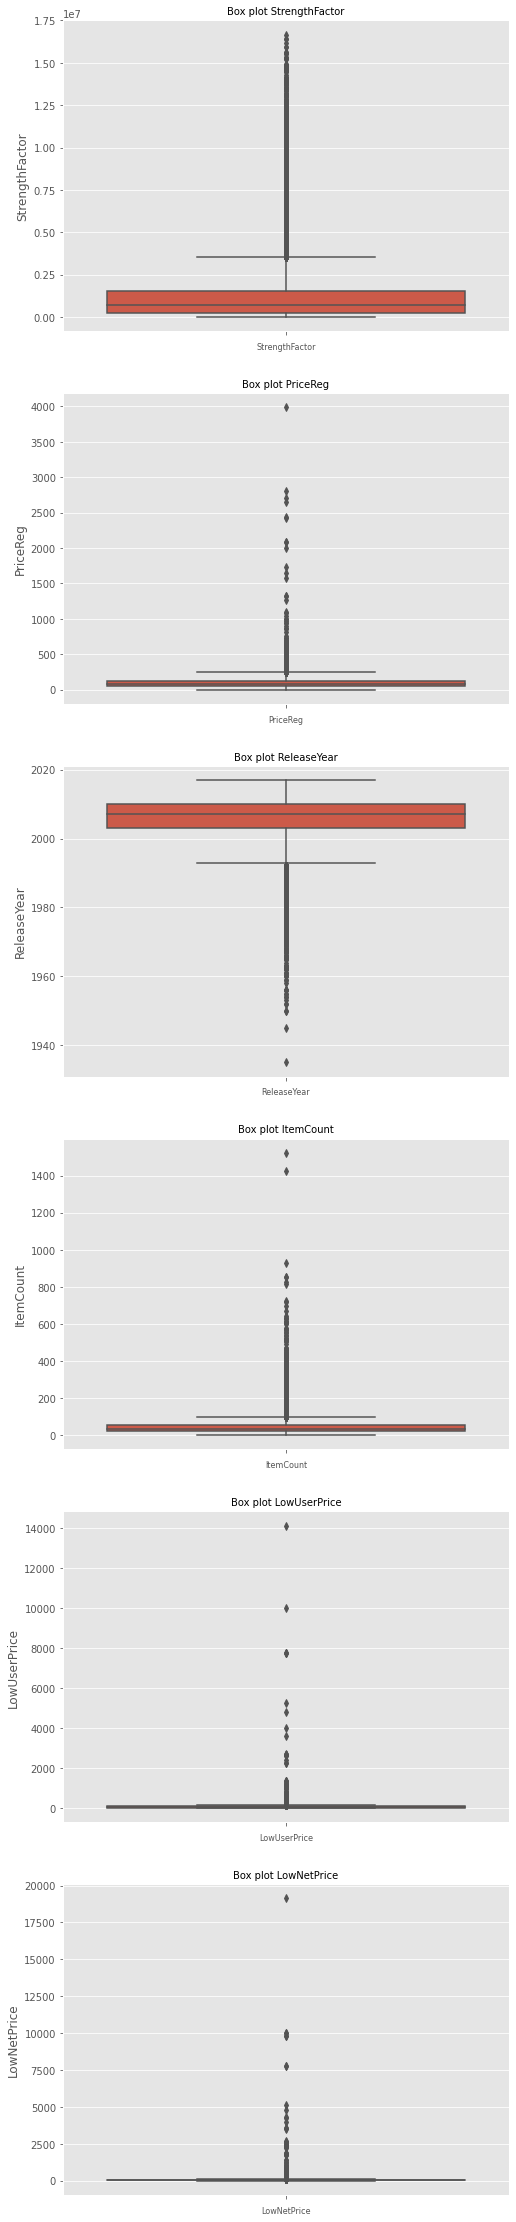

In [18]:
#univariate outlier detection
cols = ['StrengthFactor', 'PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice']

fig, ax = plt.subplots(len(cols), figsize = (8,40))

for i, col_val in enumerate(cols):
    sns.boxplot(y=hist[col_val], ax=ax[i])
    ax[i].set_title('Box plot ' + col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    

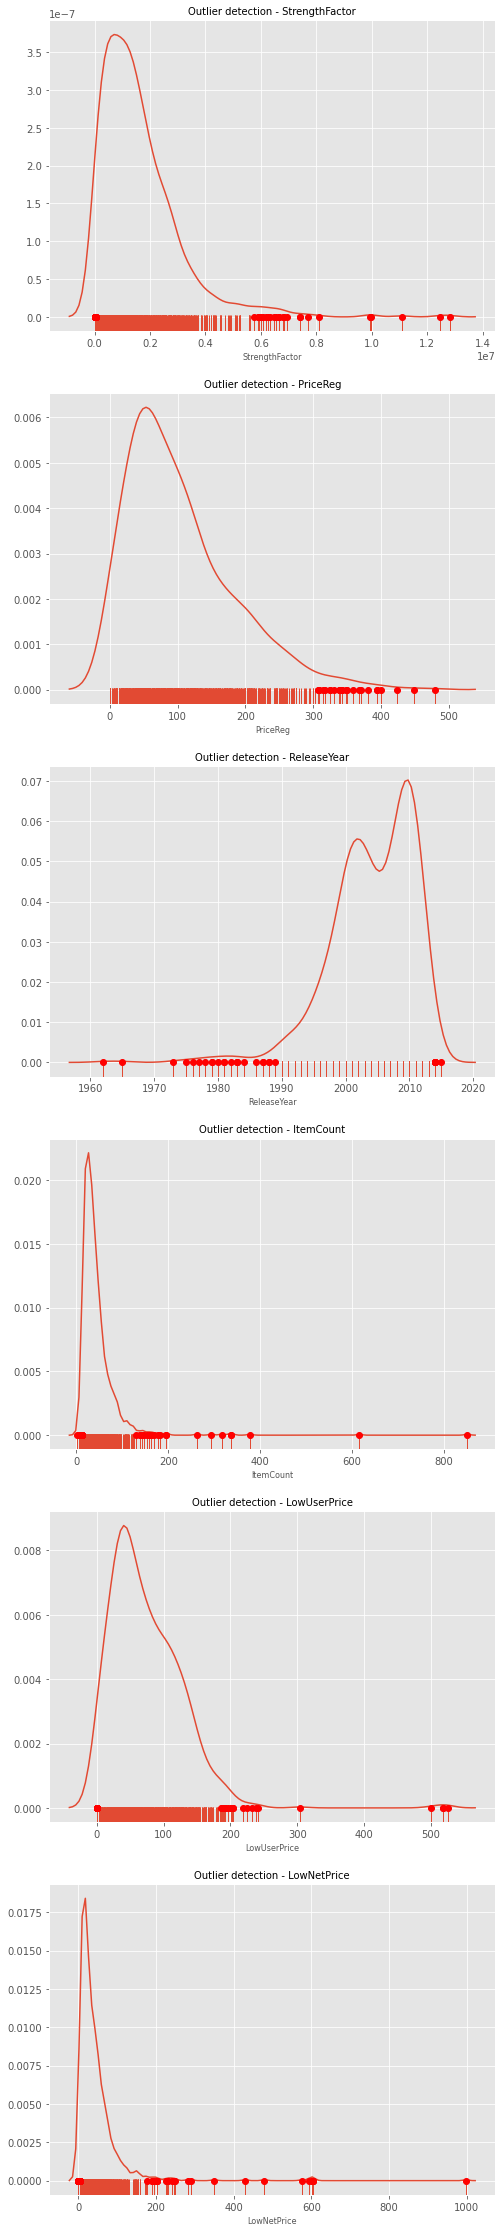

In [19]:
#percentile based outlier removal
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

col_names = ['StrengthFactor','PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
    x = hist[col_val][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

# Data Modeling

In [20]:
#converting marketing type into categorical variable
data['MarketingType'] = data['MarketingType'].astype('category')
data['MarketingType'] = data['MarketingType'].cat.codes

#splitting the historical and active state
hist = data[data['File_Type'] == 'Historical']
act = data[data['File_Type'] == 'Active']

In [21]:
remove_col_val = ['Order', 'File_Type', 'SKU_number', 'SoldCount', 'ReleaseNumber', 'SoldFlag']

y = hist['SoldFlag']

hist = hist.drop(remove_col_val, axis = 1)
act = act.drop(remove_col_val, axis = 1)

#create training and testing vars
training_features, testing_features, training_target, testing_target = train_test_split(hist, y, test_size = 0.2)
print(training_features.shape, training_target.shape)
print(testing_features.shape, testing_target.shape)

(60796, 8) (60796,)
(15200, 8) (15200,)


In [22]:
print('Class 0 numbers: ', len(training_target[training_target==0.0]))
print('Class 1 numbers: ', len(training_target[training_target==1.0]))

Class 0 numbers:  50414
Class 1 numbers:  10382


In [23]:
X_train, X_val, y_train, y_val = train_test_split(training_features, training_target, 
                                                 test_size = 0.1, random_state = 12)

In [29]:
#balancing the classes using SMOTE
sm = SMOTE(random_state=12)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

print('Class 0 numbers: ', len(y_train_res[y_train_res == 0.0]))
print('Class 1 numbers: ', len(y_train_res[y_train_res == 1.0]))

Class 0 numbers:  45341
Class 1 numbers:  45341


# Random Forest

In [46]:
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(X_train_res, y_train_res)

RandomForestClassifier(n_estimators=25, random_state=12)

In [48]:
print('Validation Results')
print(clf_rf.score(X_val, y_val))
print(recall_score(y_val, clf_rf.predict(X_val)))

pred = clf_rf.predict(testing_features)

print('\nTest Results')
print(clf_rf.score(testing_features, testing_target))
print(recall_score(testing_target, pred))

print('\nRoc AUC score')
print(roc_auc_score(testing_target, pred))

Validation Results
0.7417763157894737
0.5203574975173784

Test Results
0.7469078947368422
0.545141545524101

Roc AUC score
0.6669772561562981


Confusion matrix without normalization
[[9928 2658]
 [1189 1425]]
Normalized confusion matrix
[[0.79 0.21]
 [0.45 0.55]]


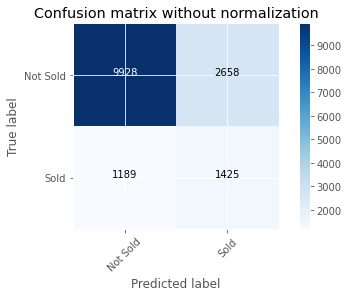

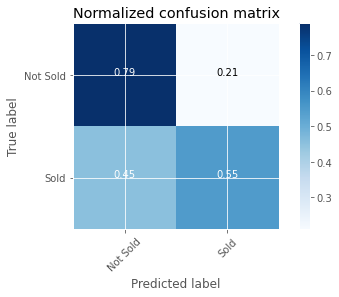

In [50]:
class_name = ['Not Sold', 'Sold']
def plot_confusion_matrix(cm, classes, normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix without normalization')
    
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#compute confusion matrix
cnf_matrix = confusion_matrix(testing_target, pred)
np.set_printoptions(precision=2)
    
#plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_name,
                         title='Confusion matrix without normalization')
    
#plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_name, normalize=True,
                         title='Normalized confusion matrix')
plt.show()

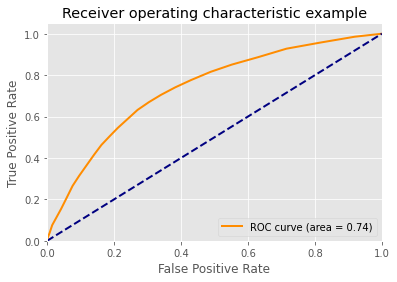

In [51]:
#compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 2
y_score = clf_rf.predict_proba(testing_features)

#compute micro_average ROC curve and AUC area
fpr['micro'], tpr['micro'], _ = roc_curve(testing_target.ravel(),
                                         y_score[:,1].ravel())
roc_auc['micro'] = auc(fpr['micro'], tpr['micro'])

plt.figure()
lw = 2

plt.plot(fpr['micro'], tpr['micro'], color='darkorange',
        lw=lw, label='ROC curve (area = %0.2f)' % roc_auc['micro'])

plt.plot([0,1],[0,1],color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = 'lower right')
plt.show()

# Logistic Regression

In [52]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train_res, y_train_res)

LogisticRegression()

In [53]:
print('Validation Results')
print(clf_lr.score(X_val, y_val))
print(recall_score(y_val, clf_lr.predict(X_val)))

pred = clf_lr.predict(testing_features)

print('\nTest Results')
print(clf_lr.score(testing_features, testing_target))
print(recall_score(testing_target, pred))

print('\nRoc AUC score')
print(roc_auc_score(testing_target, pred))

Validation Results
0.6669407894736842
0.6266137040714995

Test Results
0.6607894736842105
0.6189747513389442

Roc AUC score
0.6442243850449685


Confusion matrix without normalization
[[8426 4160]
 [ 996 1618]]
Normalized confusion matrix
[[0.67 0.33]
 [0.38 0.62]]


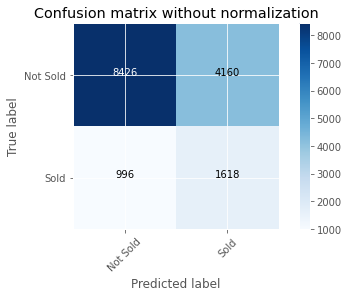

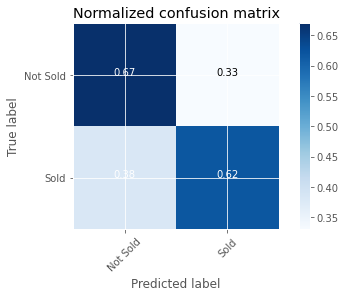

In [54]:
class_name = ['Not Sold', 'Sold']
def plot_confusion_matrix(cm, classes, normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix without normalization')
    
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#compute confusion matrix
cnf_matrix = confusion_matrix(testing_target, pred)
np.set_printoptions(precision=2)
    
#plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_name,
                         title='Confusion matrix without normalization')
    
#plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_name, normalize=True,
                         title='Normalized confusion matrix')
plt.show()

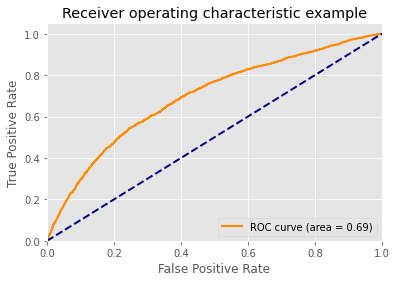

In [55]:
#compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 2
y_score = clf_lr.predict_proba(testing_features)

#compute micro_average ROC curve and AUC area
fpr['micro'], tpr['micro'], _ = roc_curve(testing_target.ravel(),
                                         y_score[:,1].ravel())
roc_auc['micro'] = auc(fpr['micro'], tpr['micro'])

plt.figure()
lw = 2

plt.plot(fpr['micro'], tpr['micro'], color='darkorange',
        lw=lw, label='ROC curve (area = %0.2f)' % roc_auc['micro'])

plt.plot([0,1],[0,1],color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = 'lower right')
plt.show()

# XGBoost

In [56]:
from xgboost import XGBClassifier
clf_xg = XGBClassifier()
clf_xg.fit(X_train_res, y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
print('Validation Results')
print(clf_xg.score(X_val, y_val))
print(recall_score(y_val, clf_xg.predict(X_val)))

pred = clf_xg.predict(testing_features)

print('\nTest Results')
print(clf_xg.score(testing_features, testing_target))
print(recall_score(testing_target, pred))

print('\nRoc AUC score')
print(roc_auc_score(testing_target, pred))

Validation Results
0.7473684210526316
0.5302879841112215

Test Results
0.753421052631579
0.5432287681713849

Roc AUC score
0.6701524422455526


Confusion matrix without normalization
[[10032  2554]
 [ 1194  1420]]
Normalized confusion matrix
[[0.8  0.2 ]
 [0.46 0.54]]


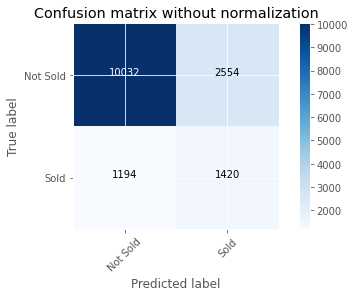

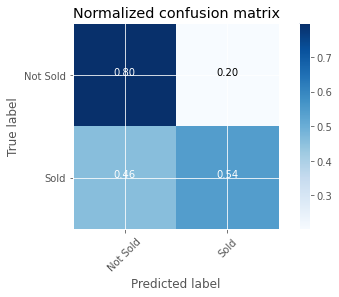

In [58]:
class_name = ['Not Sold', 'Sold']
def plot_confusion_matrix(cm, classes, normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix without normalization')
    
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#compute confusion matrix
cnf_matrix = confusion_matrix(testing_target, pred)
np.set_printoptions(precision=2)
    
#plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_name,
                         title='Confusion matrix without normalization')
    
#plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_name, normalize=True,
                         title='Normalized confusion matrix')
plt.show()

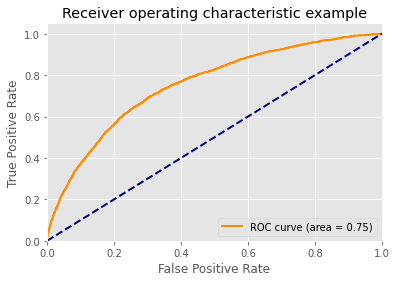

In [45]:
#compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 2
y_score = clf_xg.predict_proba(testing_features)

#compute micro_average ROC curve and AUC area
fpr['micro'], tpr['micro'], _ = roc_curve(testing_target.ravel(),
                                         y_score[:,1].ravel())
roc_auc['micro'] = auc(fpr['micro'], tpr['micro'])

plt.figure()
lw = 2

plt.plot(fpr['micro'], tpr['micro'], color='darkorange',
        lw=lw, label='ROC curve (area = %0.2f)' % roc_auc['micro'])

plt.plot([0,1],[0,1],color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = 'lower right')
plt.show()